In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
age_mean = df.iloc[:,1].mean()


df.iloc[:,1] = df.iloc[:,1].fillna(age_mean)



In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size = 0.2,random_state=42)

Text(0.5, 1.0, 'Age QQ')

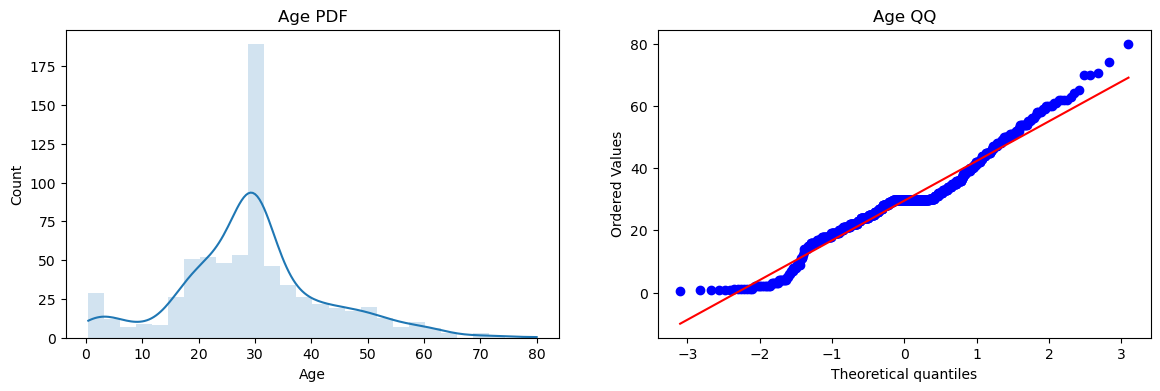

In [9]:
# 121 means 1,2,1 ie, rows 1, cols =2, index = 1(of that graph)
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True,alpha=0.2,edgecolor=None)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ')

Text(0.5, 1.0, 'Fare QQ')

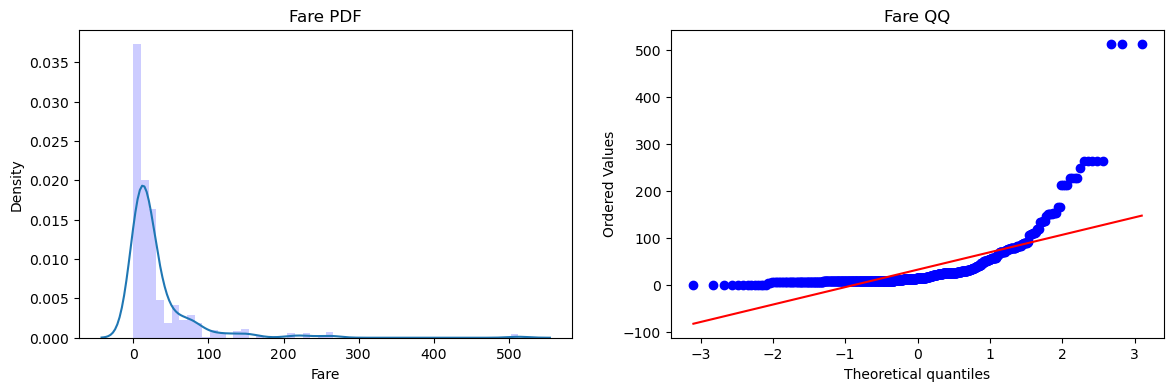

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X_train['Fare'], bins=50, density=True, alpha=0.2, color='b')
sns.kdeplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ')

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


Text(0.5, 1.0, 'Fare QQ after log')

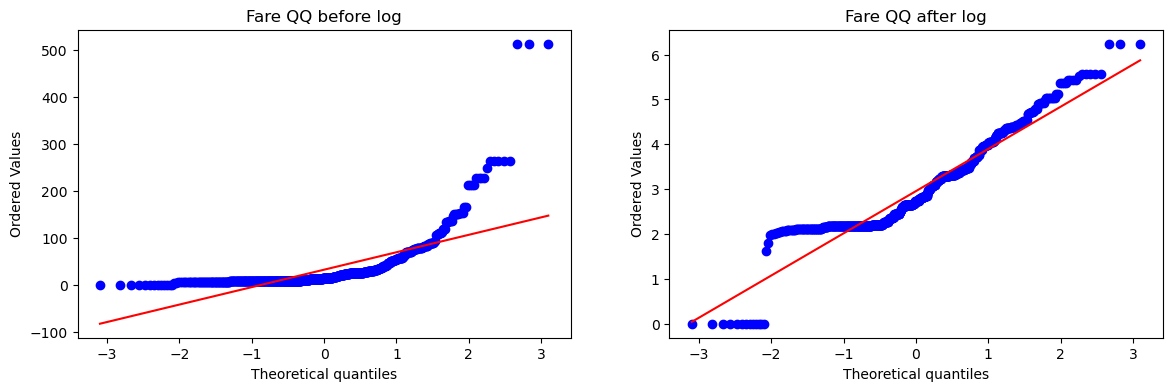

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ after log')

Text(0.5, 1.0, 'Age QQ after log')

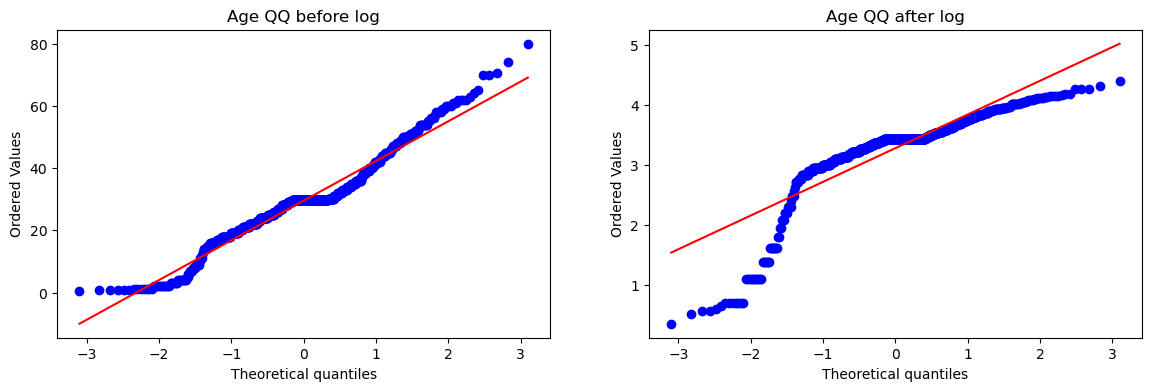

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age QQ after log')

In [19]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [22]:
X_transformed2 = trf2.fit_transform(df.iloc[:,1:3])

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,df.iloc[:,0],scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588389513108613


In [23]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("LR",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot = plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist ="norm",plot = plt)
    # [:,0] is due to  X_trans is np.array
    plt.title('Fare After Transform')

    plt.show()
   

LR 0.6645193508114856


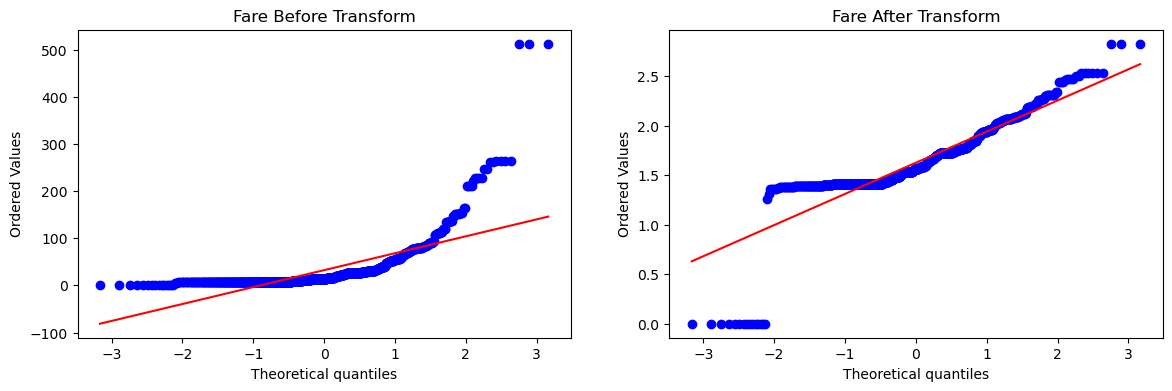

In [24]:
apply_transform(lambda x: x**(1/6))